In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error

In [3]:
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs(((y_true-y_pred)/y_true)))*100
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [4]:
os.getcwd()

'C:\\Users\\hp\\Downloads'

In [5]:
AEP=pd.read_csv('PJME_hourly.csv')

In [6]:
AEP.head()

Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0

In [7]:
AEP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
Datetime    145366 non-null object
PJME_MW     145366 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [8]:
AEP=AEP.rename(columns={'PJME_MW':'AEP_MW'})

In [9]:
AEP['Datetime']=pd.to_datetime(AEP['Datetime'],format=('%Y-%m-%d'))

In [10]:
AEP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
Datetime    145366 non-null datetime64[ns]
AEP_MW      145366 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [11]:
AEP['Hours_of_day']=AEP['Datetime'].dt.hour

In [12]:
AEP['Year']=AEP['Datetime'].dt.year

In [13]:
AEP['Daily']=AEP['Datetime'].dt.day

In [14]:
AEP['Month']=AEP['Datetime'].dt.month

In [15]:
#### hours
AEP.groupby(['Year','Daily','Month']).agg({'AEP_MW':'sum'}).reset_index()

Year  Daily  Month    AEP_MW
0     2002      1      1  714857.0
1     2002      1      2  711909.0
2     2002      1      3  756887.0
3     2002      1      4  660494.0
4     2002      1      5  669293.0
...    ...    ...    ...       ...
6054  2018     30      7  790978.0
6055  2018     31      1  892323.0
6056  2018     31      3  605137.0
6057  2018     31      5  754680.0
6058  2018     31      7  828938.0

[6059 rows x 4 columns]

In [16]:
AEP['Week']=AEP['Datetime'].dt.week

In [17]:
AEP['Quarter']=AEP['Datetime'].dt.quarter

In [18]:
AEP

Datetime   AEP_MW  Hours_of_day  Year  Daily  Month  Week  \
0      2002-12-31 01:00:00  26498.0             1  2002     31     12     1   
1      2002-12-31 02:00:00  25147.0             2  2002     31     12     1   
2      2002-12-31 03:00:00  24574.0             3  2002     31     12     1   
3      2002-12-31 04:00:00  24393.0             4  2002     31     12     1   
4      2002-12-31 05:00:00  24860.0             5  2002     31     12     1   
...                    ...      ...           ...   ...    ...    ...   ...   
145361 2018-01-01 20:00:00  44284.0            20  2018      1      1     1   
145362 2018-01-01 21:00:00  43751.0            21  2018      1      1     1   
145363 2018-01-01 22:00:00  42402.0            22  2018      1      1     1   
145364 2018-01-01 23:00:00  40164.0            23  2018      1      1     1   
145365 2018-01-02 00:00:00  38608.0             0  2018      2      1     1   

        Quarter  
0             4  
1             4  
2             4  
3             4  
4             4  
...         ...  
145361        1  
145362        1  
145363        1  
145364        1  
145365        1  

[145366 rows x 8 columns]

# Putting all data together complete analysis of our target variable for all the dates from 2004 to 2018 :: 

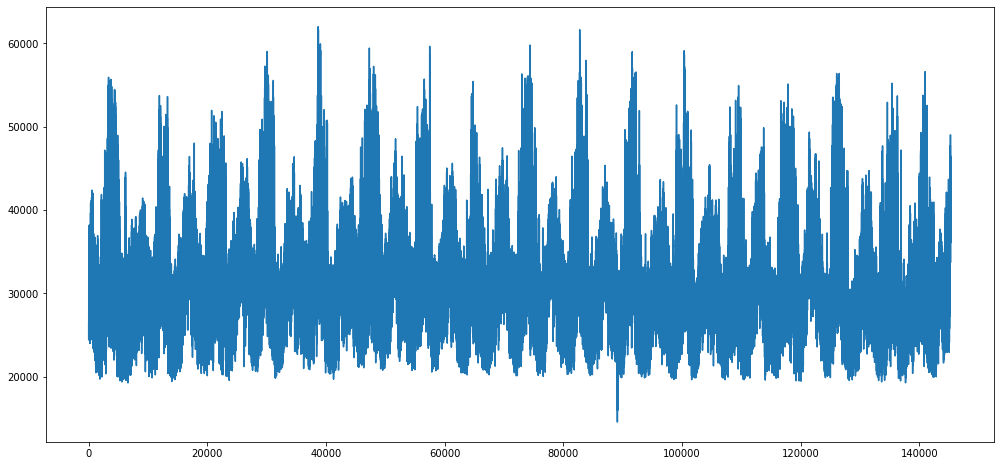

In [19]:
plt.figure(figsize=(17,8))
plt.plot(AEP.AEP_MW)
plt.show()

# Quarterly analysis of our Data for each years :: 

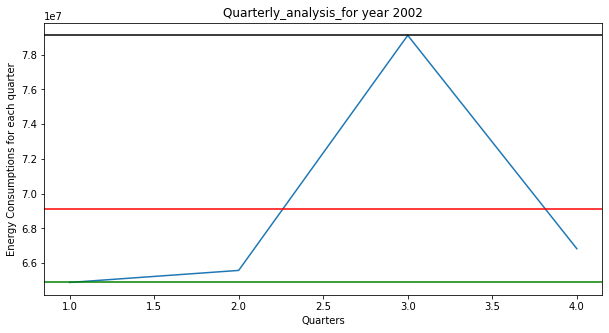

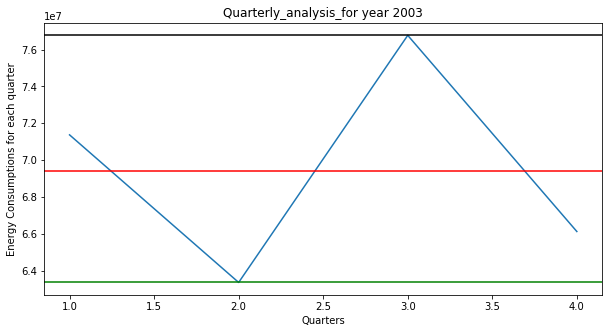

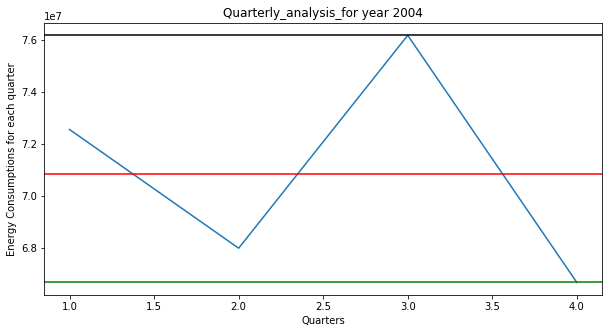

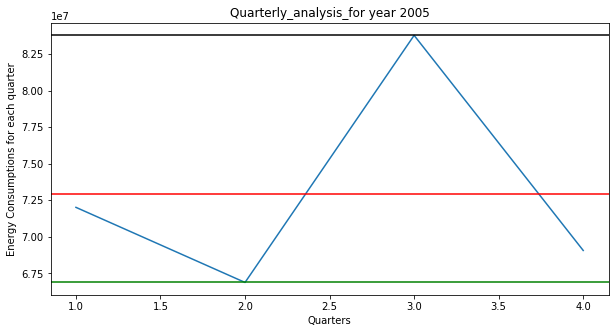

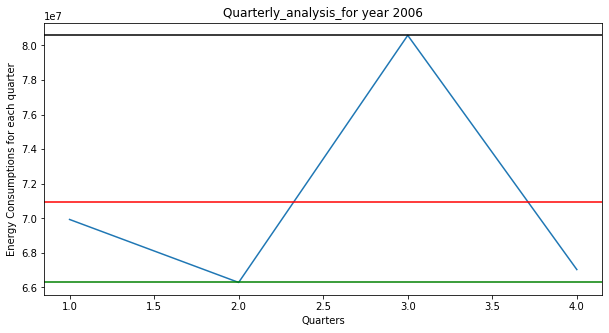

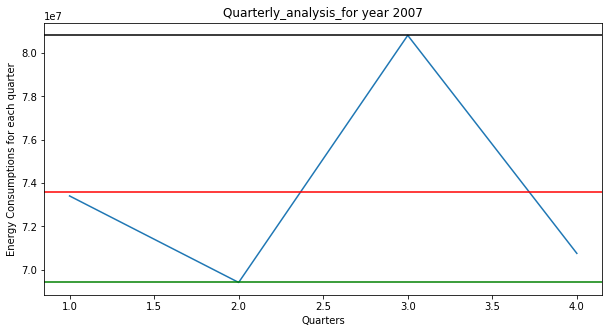

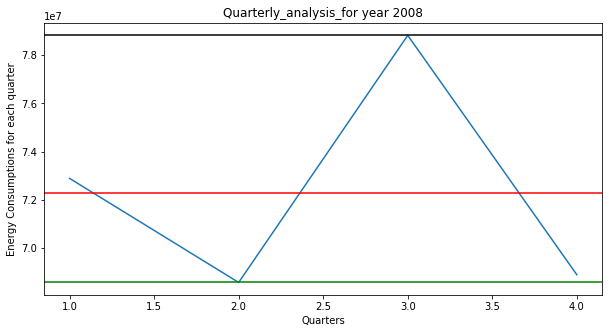

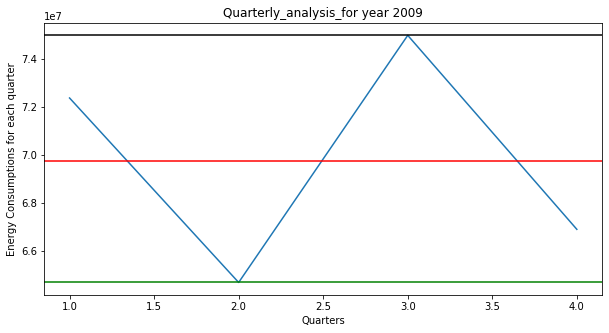

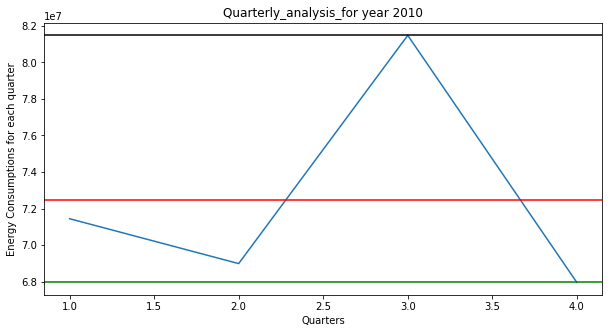

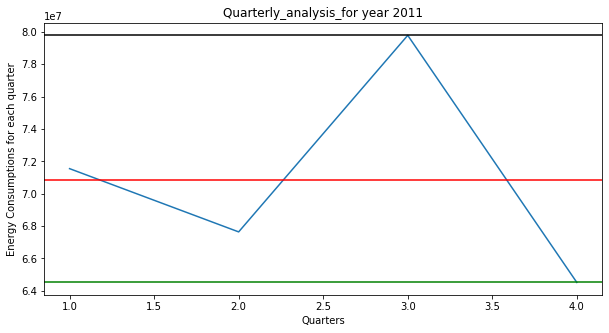

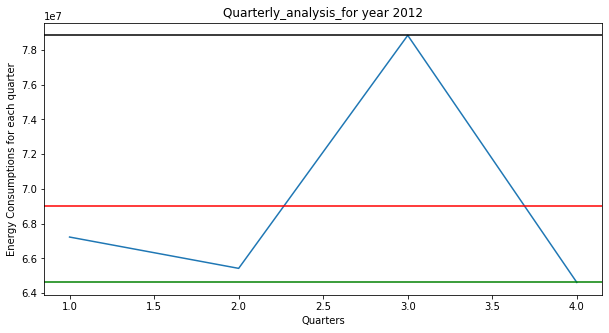

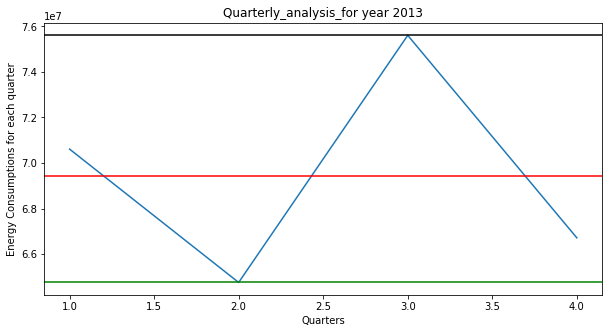

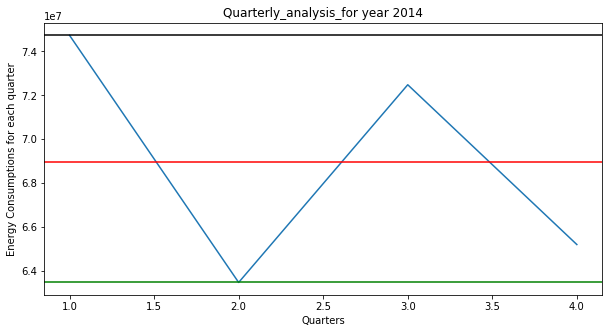

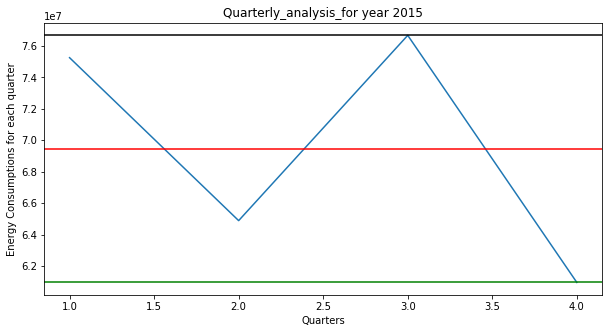

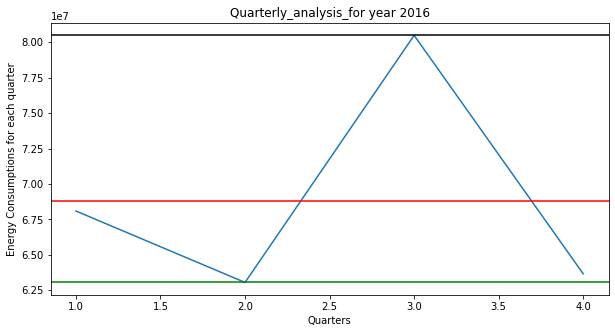

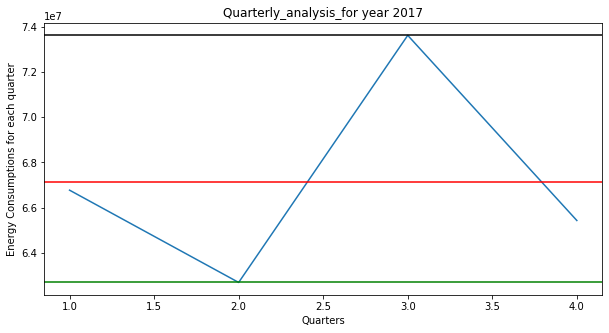

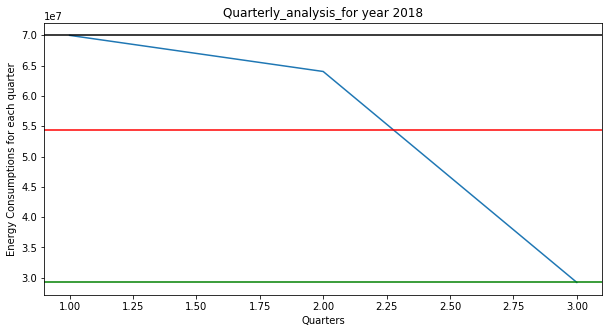

In [20]:
for i in AEP['Year'].unique():
    x=AEP[AEP['Year']==i]
    x=x.groupby(['Quarter']).agg({'AEP_MW':'sum'})
    plt.figure(figsize=(10,5))
    plt.plot(x.AEP_MW)
    plt.axhline(y=np.mean(x.AEP_MW),color='red')
    plt.axhline(y=np.min(x.AEP_MW),color='green')
    plt.axhline(y=np.max(x.AEP_MW),color='black')
    plt.title('Quarterly_analysis_for year {}'.format(i))
    plt.xlabel('Quarters')
    plt.ylabel('Energy Consumptions for each quarter')

# Monthly analysis of our Data for each years :: 

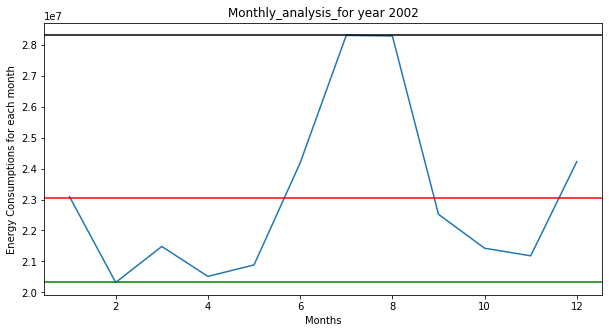

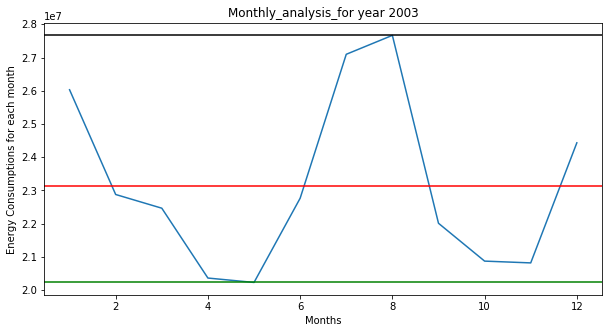

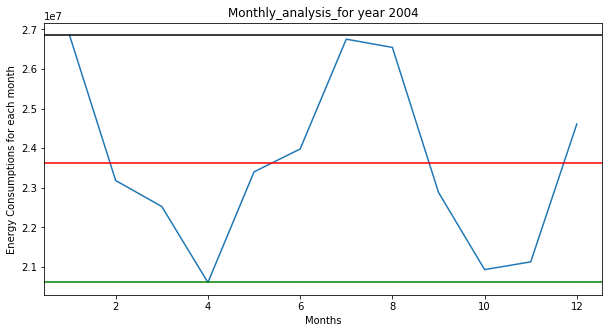

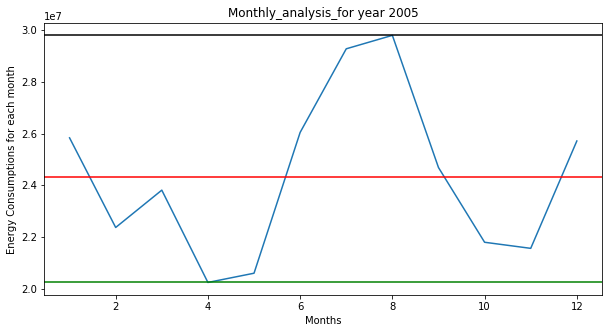

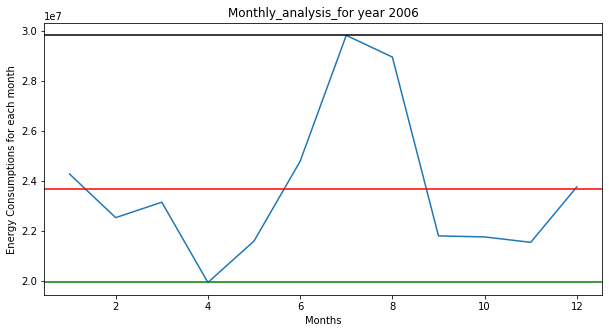

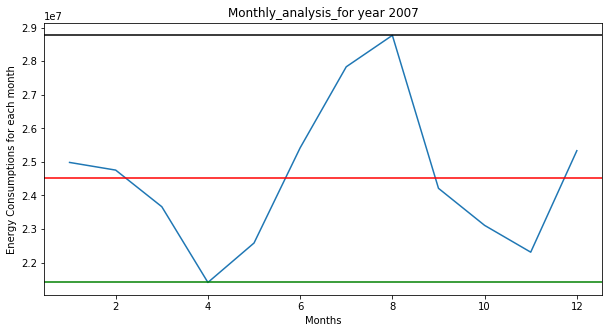

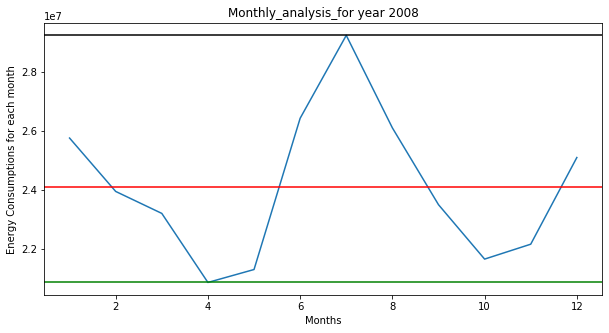

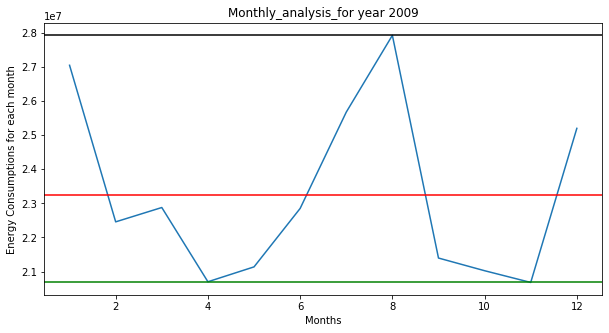

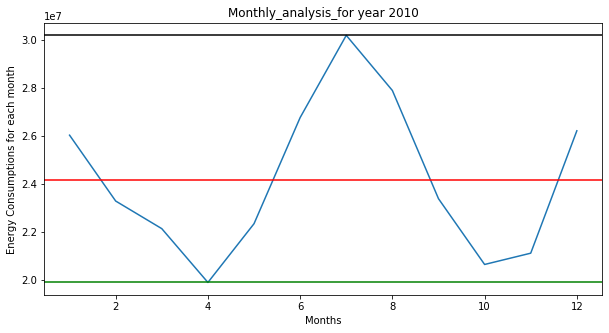

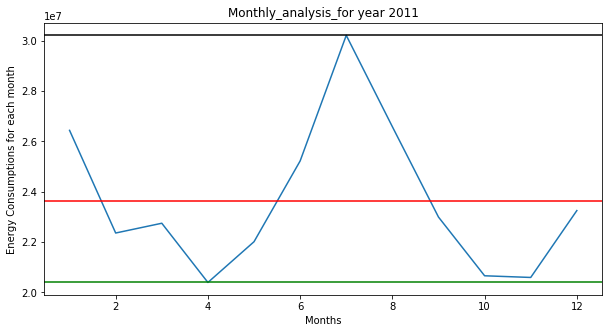

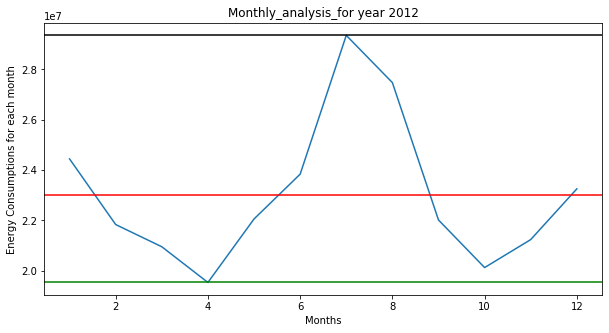

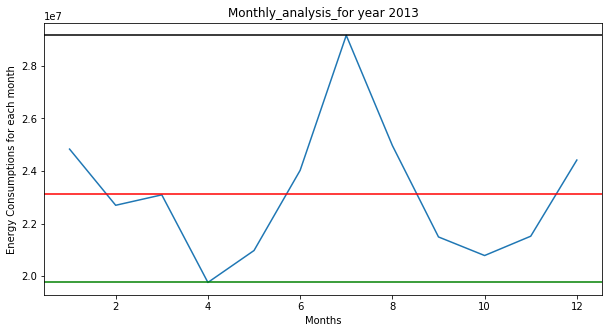

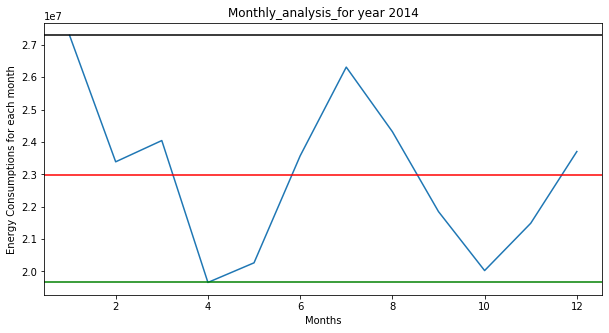

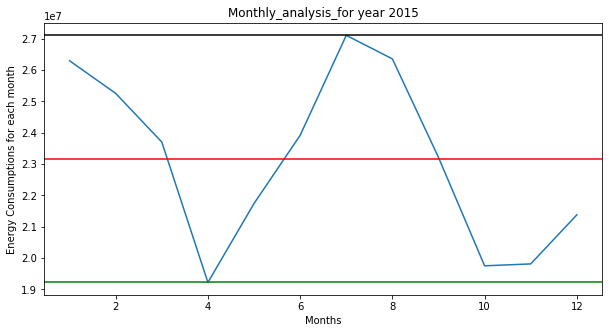

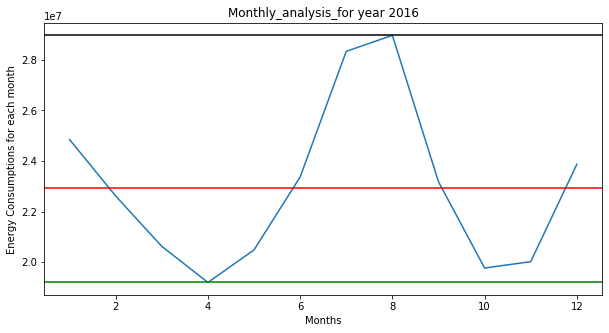

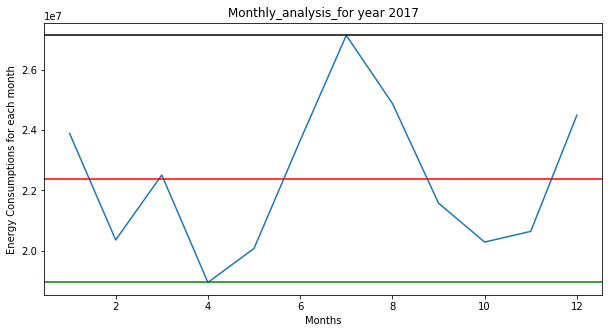

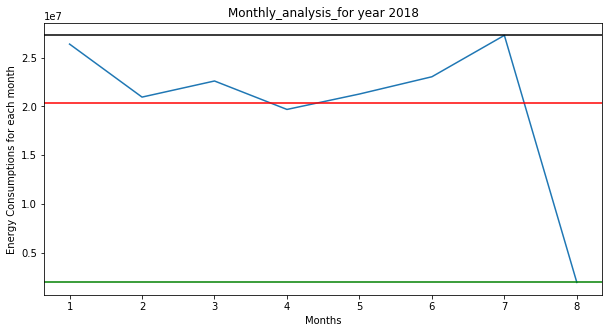

In [21]:
for i in AEP['Year'].unique():
    x=AEP[AEP['Year']==i]
    x=x.groupby(['Month']).agg({'AEP_MW':'sum'})
    plt.figure(figsize=(10,5))
    plt.plot(x.AEP_MW)
    plt.axhline(y=np.mean(x.AEP_MW),color='red')
    plt.axhline(y=np.min(x.AEP_MW),color='green')
    plt.axhline(y=np.max(x.AEP_MW),color='black')
    plt.title('Monthly_analysis_for year {}'.format(i))
    plt.xlabel('Months')
    plt.ylabel('Energy Consumptions for each month')
    plt.grid(False)

# Weekly analysis of our Data for each years :: 

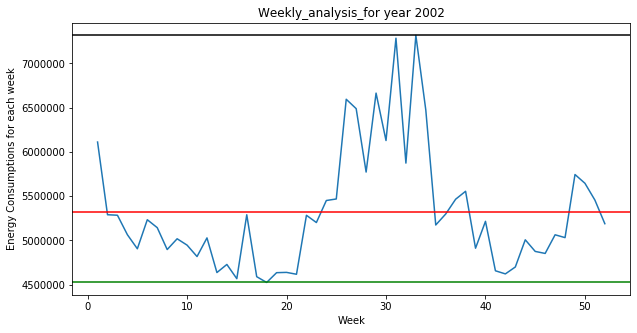

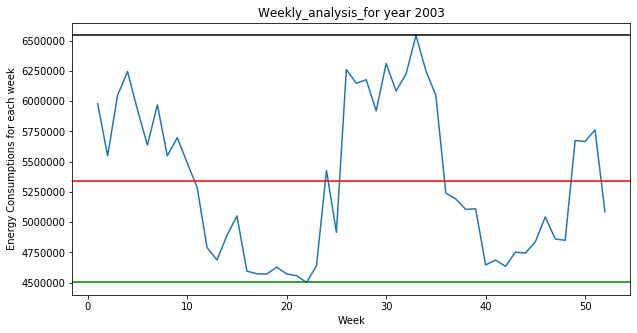

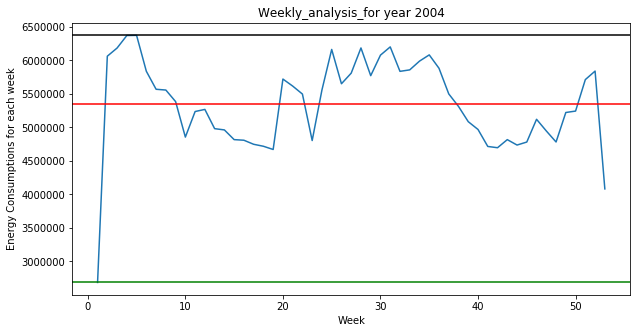

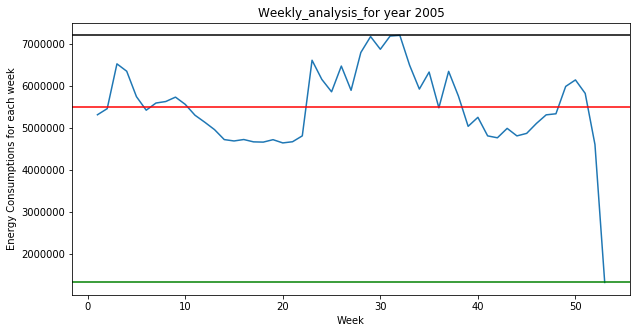

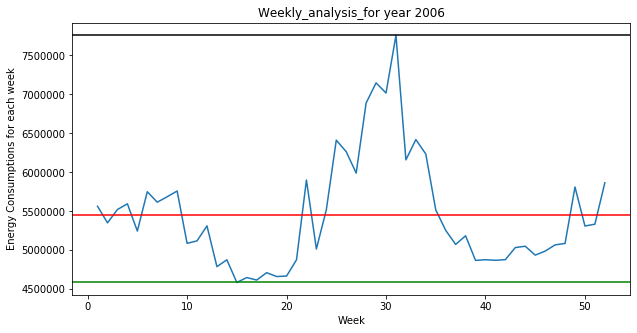

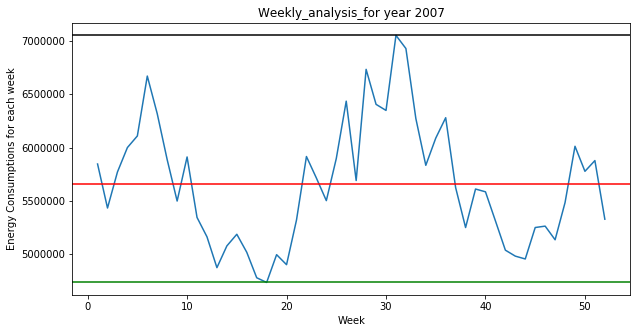

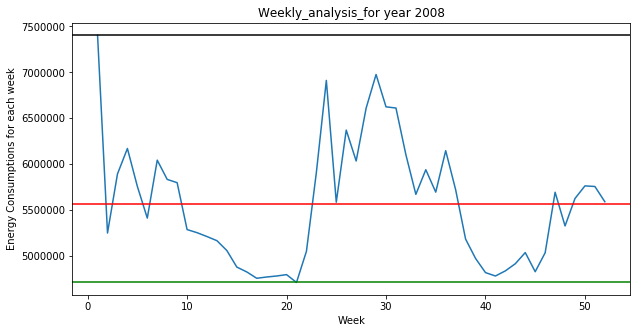

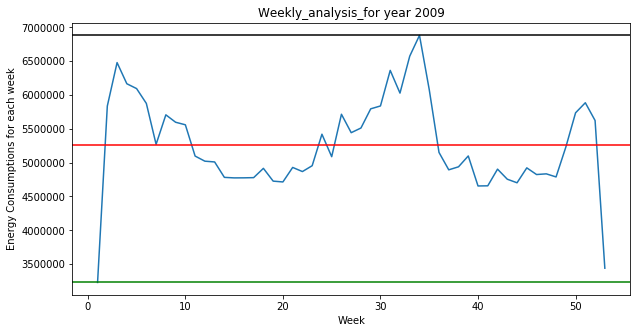

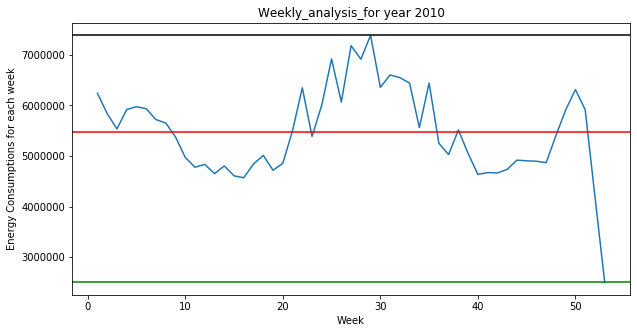

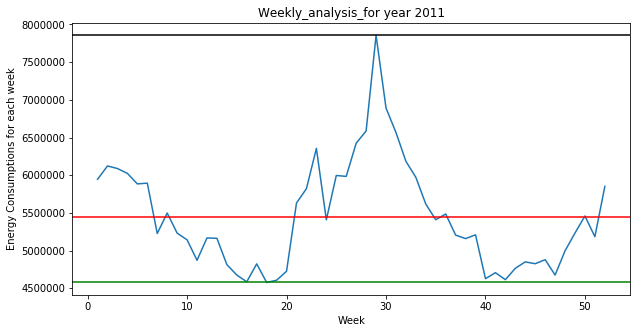

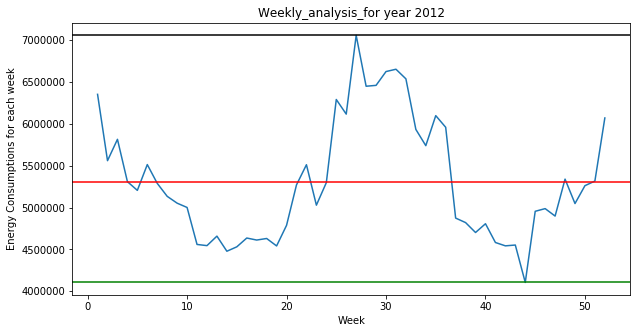

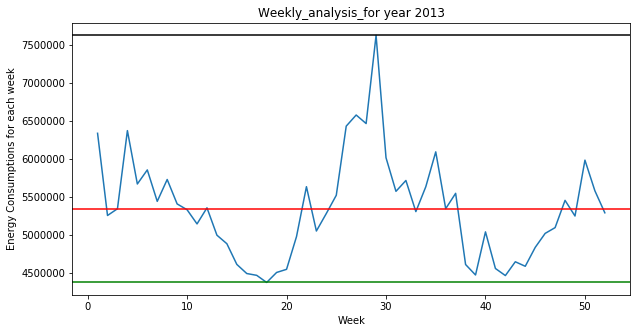

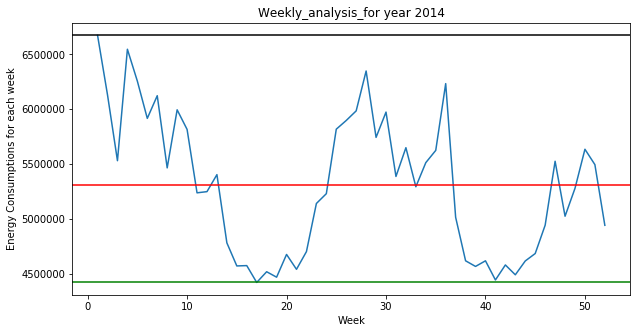

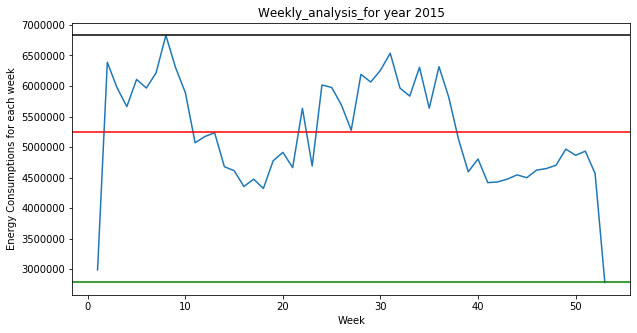

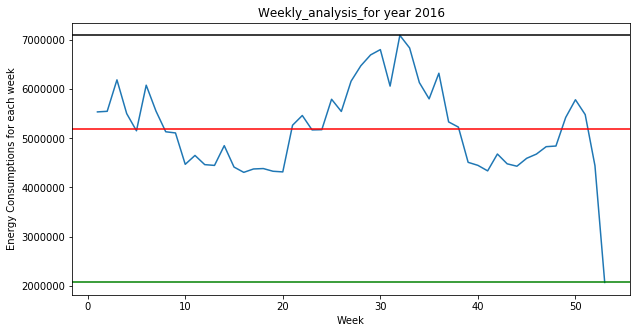

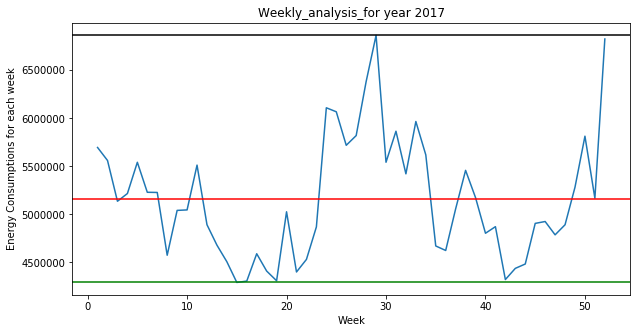

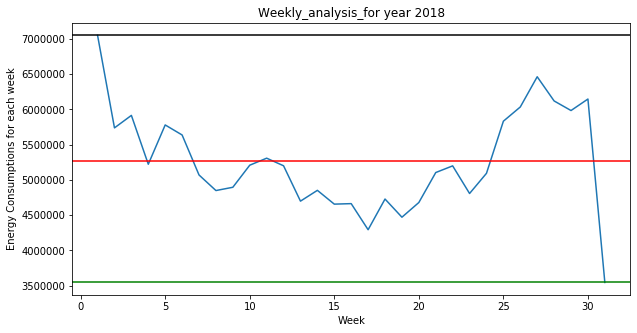

In [22]:
for i in AEP['Year'].unique():
    x=AEP[AEP['Year']==i]
    x=x.groupby(['Week']).agg({'AEP_MW':'sum'})
    plt.figure(figsize=(10,5))
    plt.plot(x.AEP_MW)
    plt.axhline(y=np.mean(x.AEP_MW),color='red')
    plt.axhline(y=np.min(x.AEP_MW),color='green')
    plt.axhline(y=np.max(x.AEP_MW),color='black')
    plt.title('Weekly_analysis_for year {}'.format(i))
    plt.xlabel('Week')
    plt.ylabel('Energy Consumptions for each week')
    plt.grid(False)

# Daily analysis of our Data for each years :: 

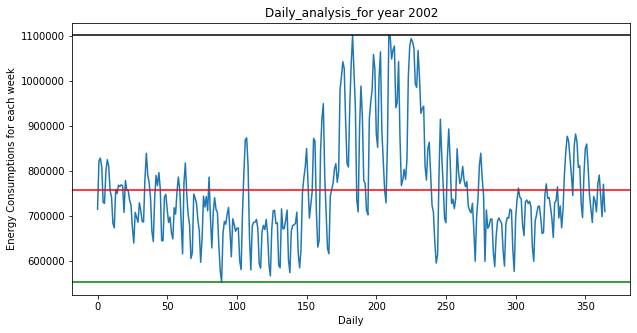

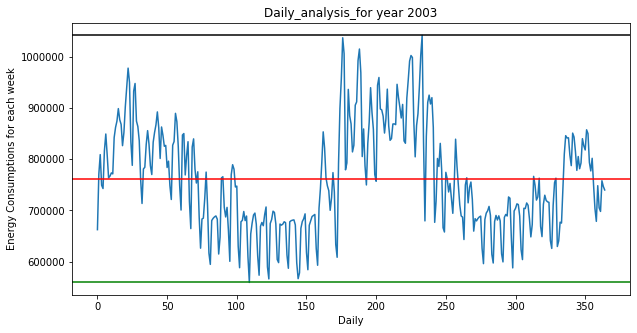

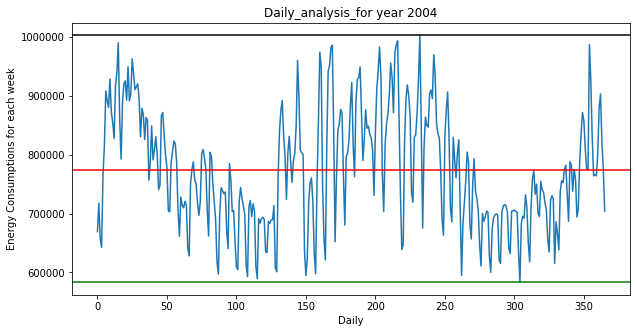

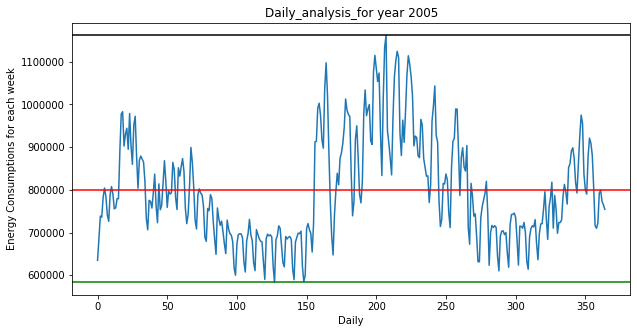

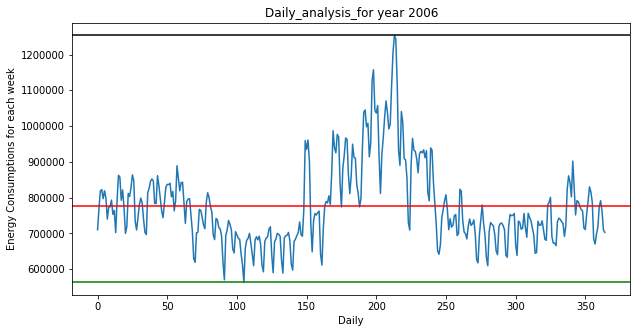

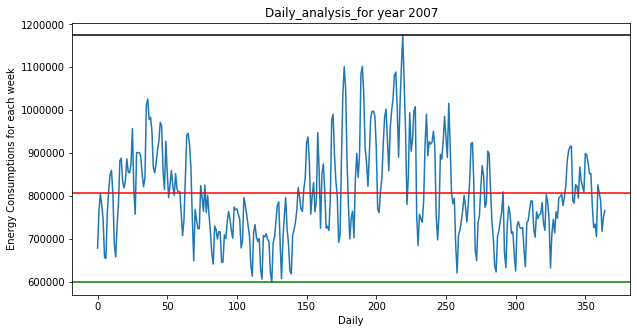

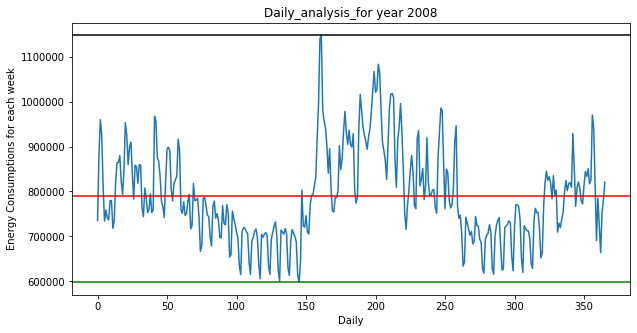

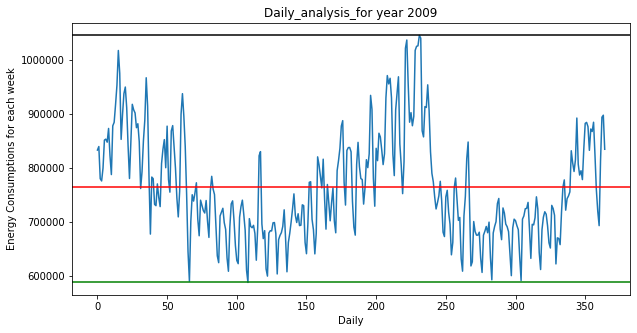

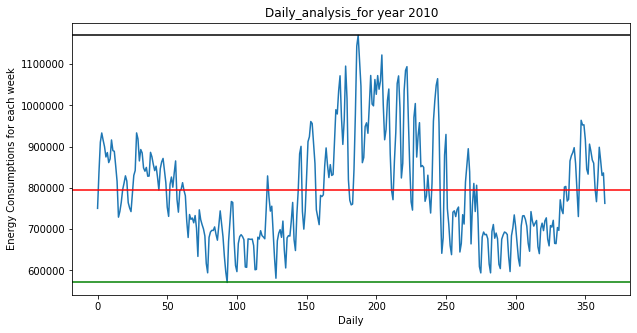

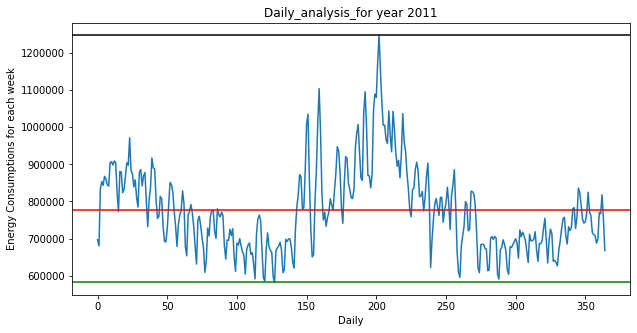

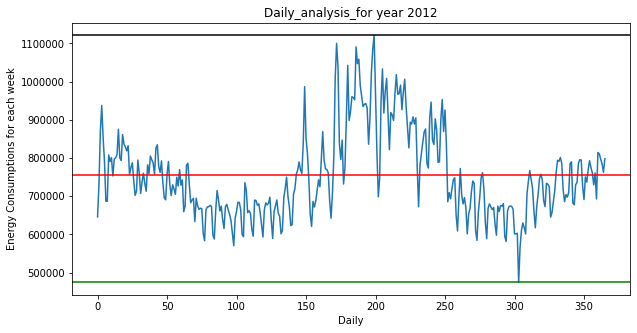

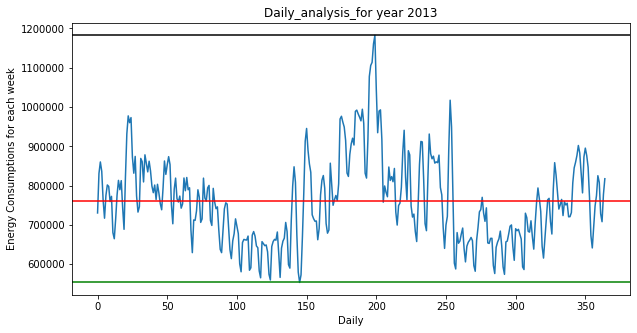

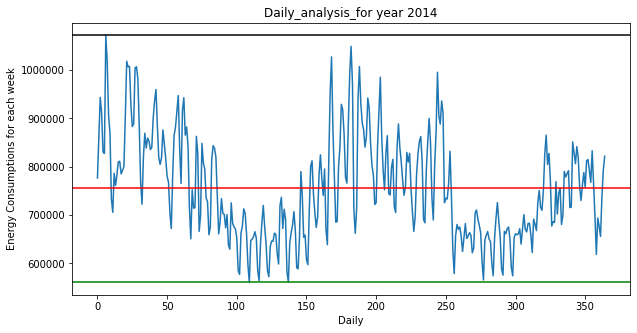

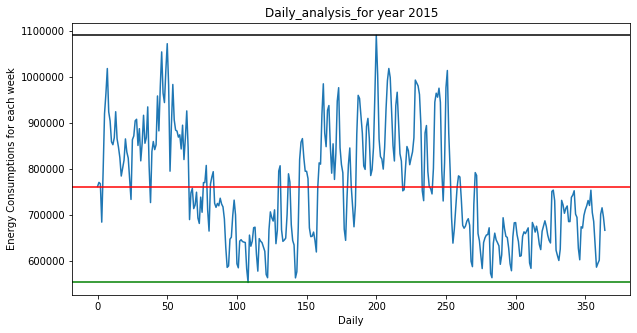

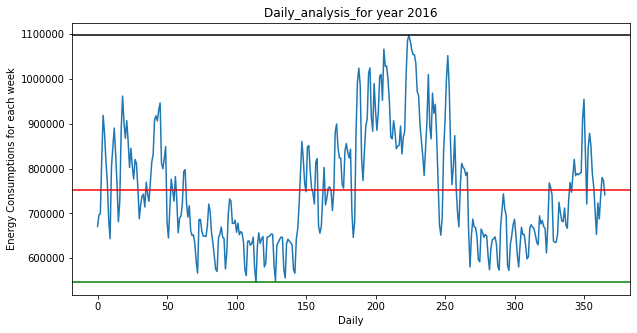

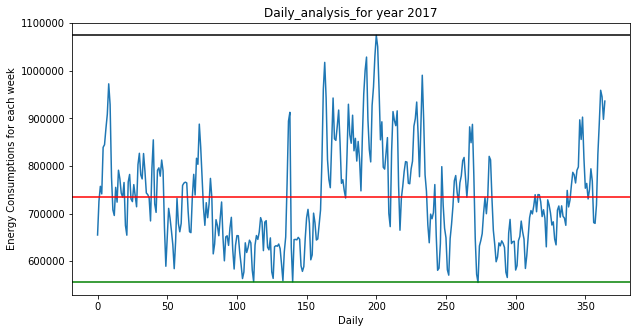

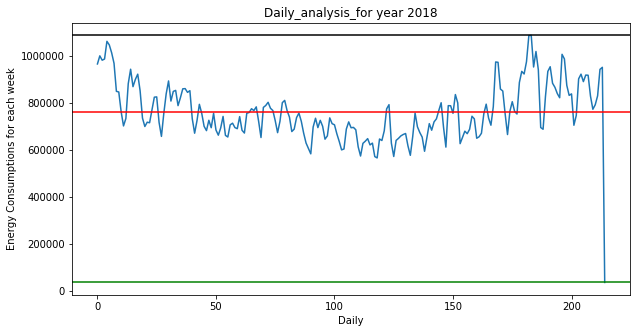

In [23]:
for i in AEP['Year'].unique():
    x=AEP[AEP['Year']==i]
    x=x.groupby(['Month','Daily']).agg({'AEP_MW':'sum'}).reset_index()
    plt.figure(figsize=(10,5))
    plt.plot(x.AEP_MW)
    plt.axhline(y=np.mean(x.AEP_MW),color='red')
    plt.axhline(y=np.min(x.AEP_MW),color='green')
    plt.axhline(y=np.max(x.AEP_MW),color='black')
    plt.title('Daily_analysis_for year {}'.format(i))
    plt.xlabel('Daily')
    plt.ylabel('Energy Consumptions for each week')
    plt.grid(False)

In [24]:
check_df=AEP.copy()

In [25]:
check_list=[]
for i in check_df['Datetime']:
    i=str(i)
    check_list.append(pd.to_datetime(i.split()[0],format=('%Y-%m-%d')))

In [26]:
check_df['Datetime']=pd.Series(check_list)

In [27]:
# check_df=check_df.drop(columns='Date')

In [28]:
AEP_Daily=check_df.groupby(['Datetime']).agg({'AEP_MW':'sum'}).reset_index()

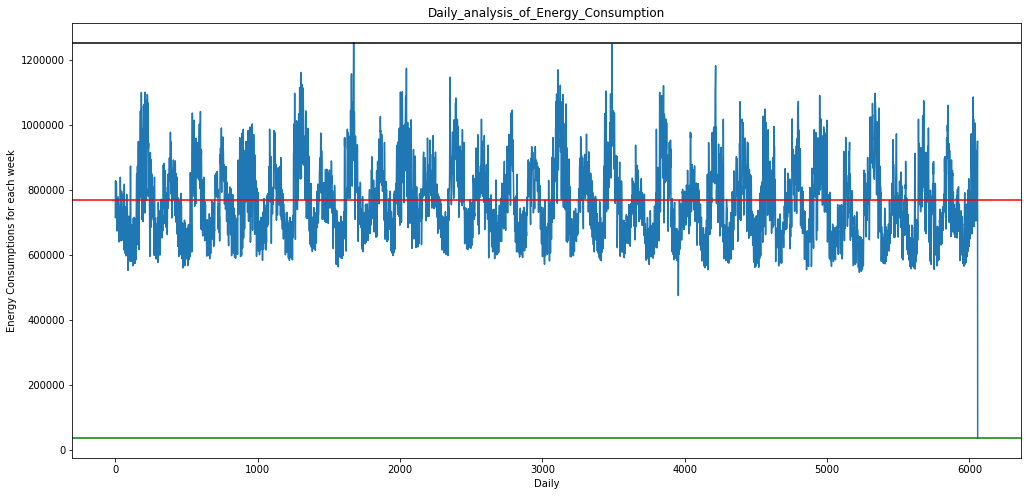

In [29]:
plt.figure(figsize=(17,8))
plt.plot(AEP_Daily.AEP_MW)
plt.axhline(y=np.mean(AEP_Daily.AEP_MW),color='red')
plt.axhline(y=np.min(AEP_Daily.AEP_MW),color='green')
plt.axhline(y=np.max(AEP_Daily.AEP_MW),color='black')
plt.title('Daily_analysis_of_Energy_Consumption')
plt.xlabel('Daily')
plt.ylabel('Energy Consumptions for each week')
plt.grid(False)

In [30]:
### On compairing each and every records for daily,weekly,monthly,quarterly and daily

# Conclusion we can made is that these energy consumption falls down in Quarter 2 of each 
# year as we can see in quarterly distribution of our data in above graphs. Also the
# month is approx(May-June) where energy consumption is low as compared to every month.


In [31]:
#Lets use moving average to smooth our time series :: 

In [32]:
def plot_moving_average(series,window,plot_intervals=False,scale=1.96):
    rolling_mean=series.rolling(window=window).mean()
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean,'g',label='Rolling mean Trend')
    #PLOT confidence interval for smoothed value :: 
    if plot_intervals:
        mae=mean_absolute_error(series[window:],rolling_mean[window:])
        deviation=np.std(series[window:]-rolling_mean[window:])
        lower_bound=rolling_mean-(mae+scale*deviation)
        upper_bound=rolling_mean+(mae+scale*deviation)
        plt.plot(upper_bound,'r--',label='Upper bound / lower bound')
        plt.plot(lower_bound,'r--')
    plt.plot(series[window:],label='Actual Value')
    plt.legend(loc='best')
    plt.grid(True)
    

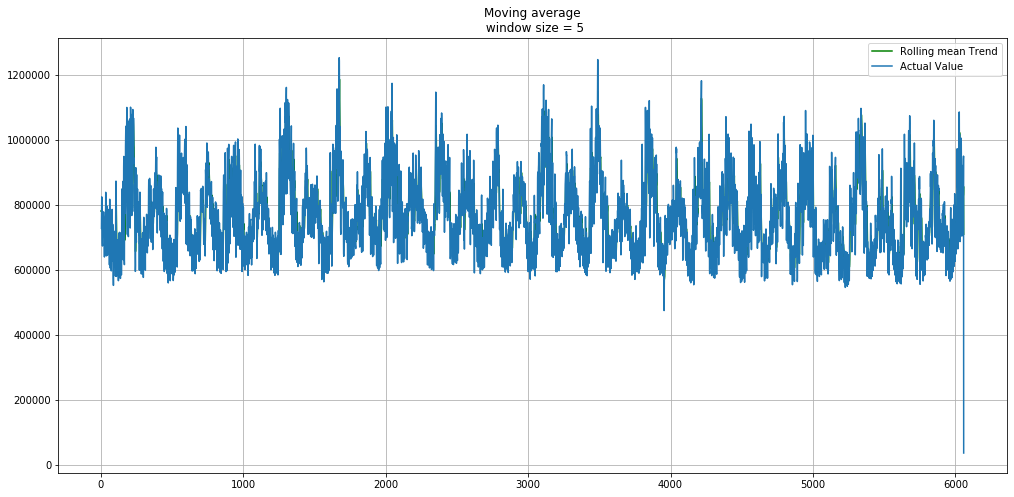

In [33]:
plot_moving_average(AEP_Daily.AEP_MW,5)

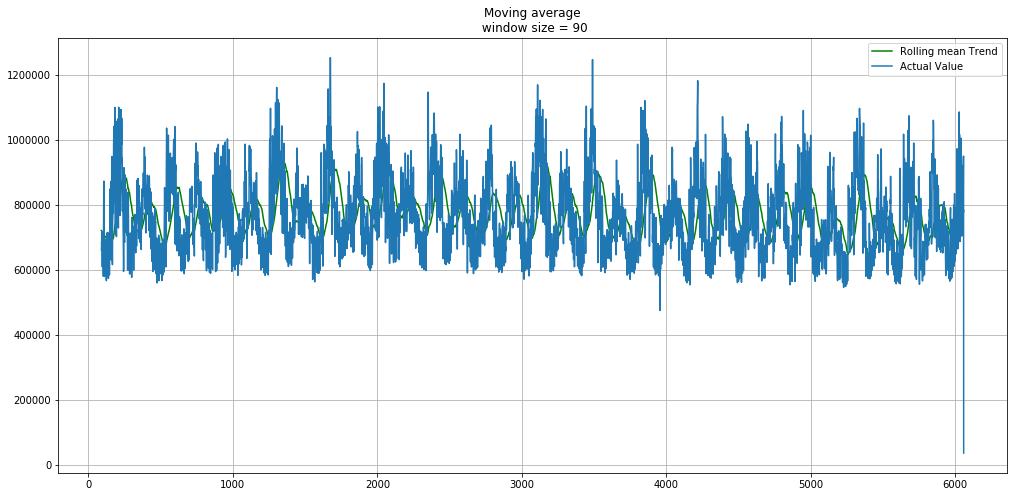

In [34]:
plot_moving_average(AEP_Daily.AEP_MW,90)

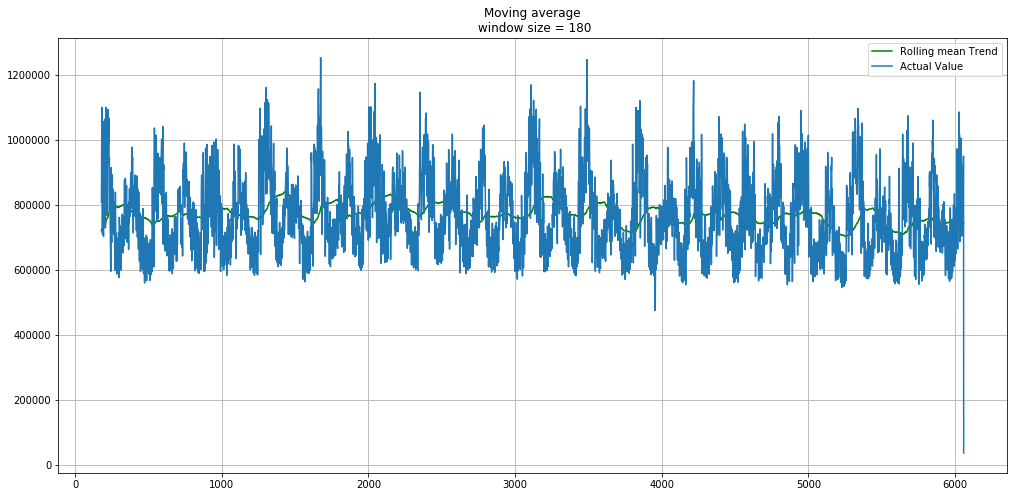

In [35]:
plot_moving_average(AEP_Daily.AEP_MW,180)

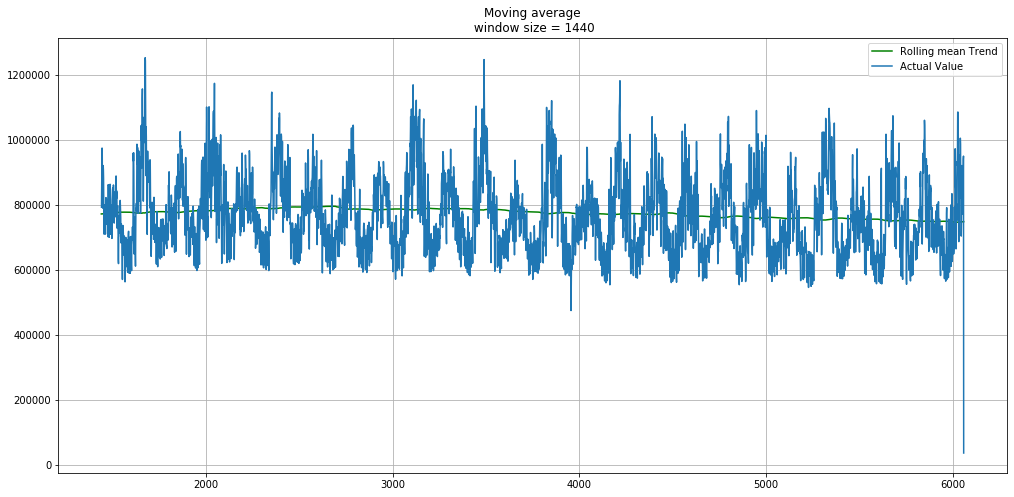

In [36]:
plot_moving_average(AEP_Daily.AEP_MW,1440)

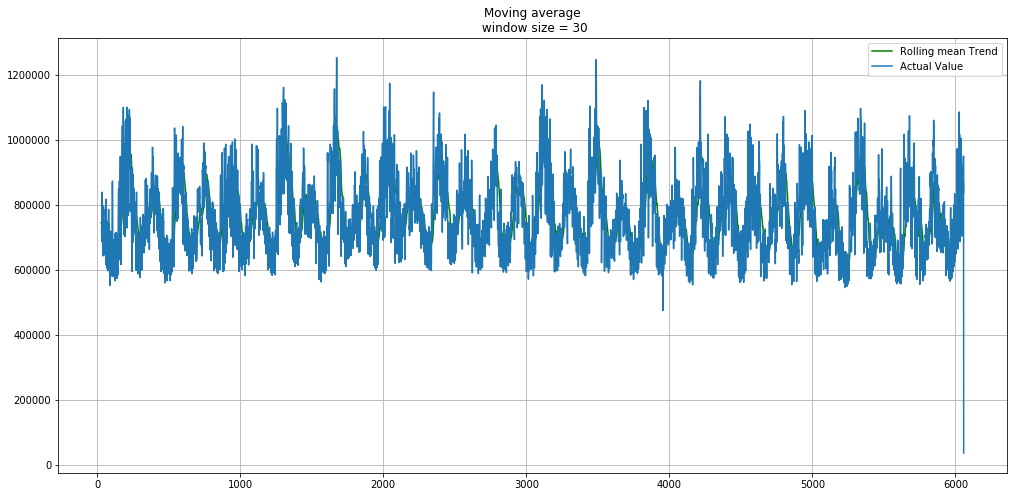

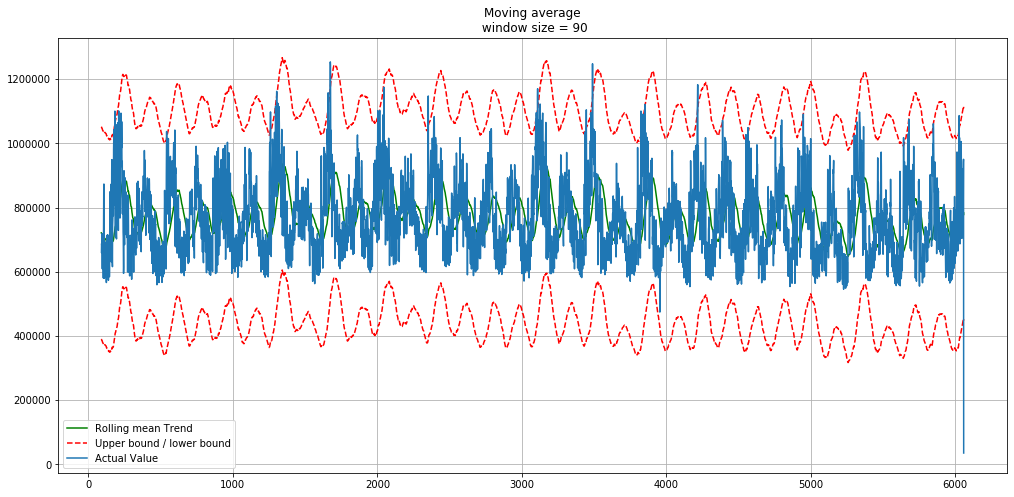

In [37]:
plot_moving_average(AEP_Daily.AEP_MW,30)
plot_moving_average(AEP_Daily.AEP_MW,90,plot_intervals=True)

- Trends are easier to spot now. Notice how the 30-day and 90-day trend show a downward curve at the end. This might mean that the energy consumption is likely to go down in the following days.

# Exponential smoothing

- Now, let’s use exponential smoothing to see if it can pick up a better trend.

In [38]:
def exponential_smoothing(series,alpha):
    result=[series[0]] 
    for n in range(1,len(series)):
        result.append(alpha*series[n]+(1-alpha)*result[n-1])
    return result
def plot_exponential_smoothing(series,alphas):
    plt.figure(figsize=(17,8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series,alpha),label='Alpha {}'.format(alpha))
    plt.plot(series.values,'c',label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Exponential Smoothing')
    plt.grid(True)



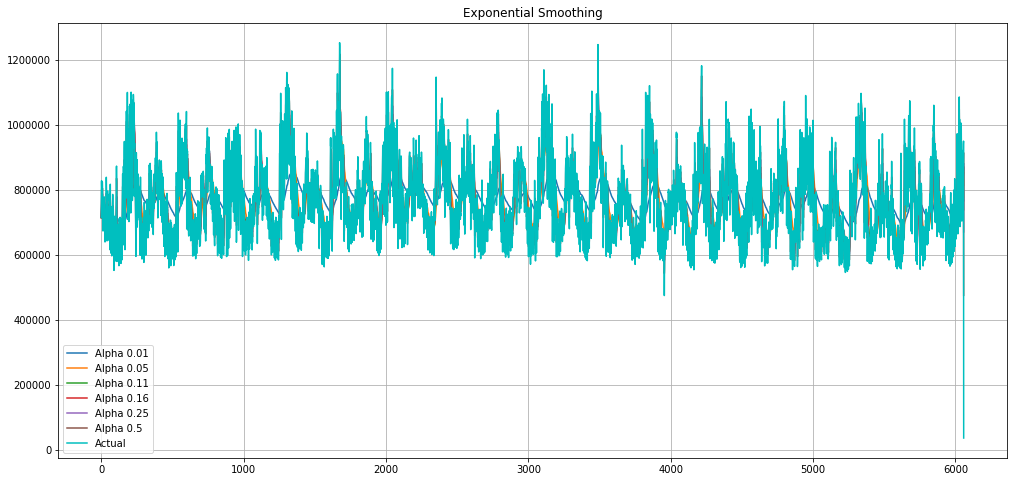

In [39]:
plot_exponential_smoothing(AEP_Daily.AEP_MW,[0.01,0.05,0.11,0.16,0.25,0.5])

In [40]:
#Now let's try double exponnetial smoothing :: 

In [41]:
def double_exponential_smoothing(series,alpha,beta):
    result=[series[0]]
    for n in range(1,len(series)+1):
        if n==1:
            level,trend=series[0],series[1]-series[0]
        if n>=len(series):
            value=result[-1]
        else:
            value=series[n]
        last_level,level=level,(alpha*value)+(1-alpha)*(level+trend)
        trend=beta*(level-last_level)+(1-beta)*trend
        result.append(level+trend)
    return result
def plot_double_exponential_smoothing(series,alphas,betas):
    plt.figure(figsize=(17,8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series,alpha,beta),
                     label='Alpha {}, Beta {}'.format(alpha,beta))
    plt.plot(series.values,'c',label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Double exponential Smoothing')
    plt.grid(True)

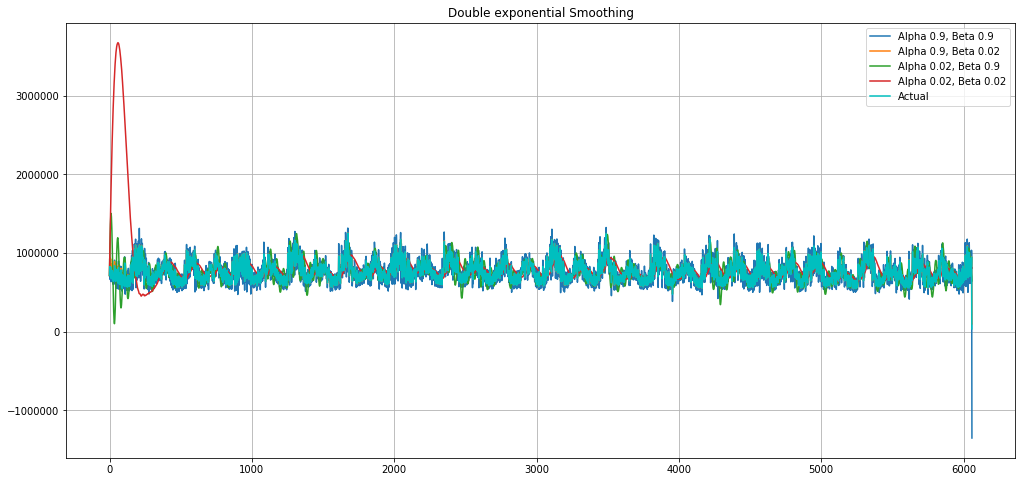

In [42]:
plot_double_exponential_smoothing(AEP_Daily.AEP_MW,[0.9,0.02],[0.9,0.02])

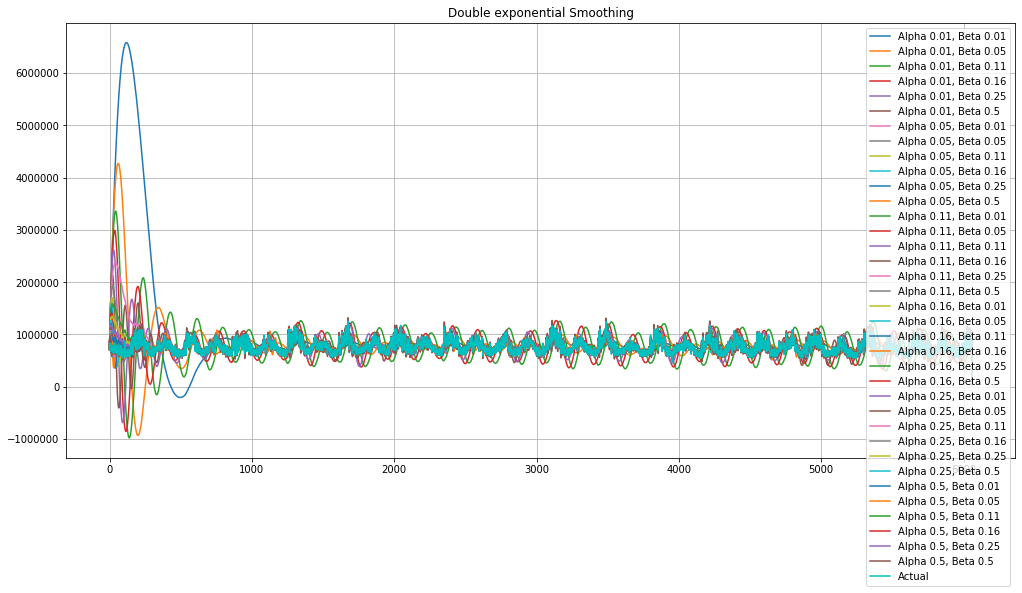

In [43]:
plot_double_exponential_smoothing(AEP_Daily.AEP_MW,[0.01,0.05,0.11,0.16,0.25,0.5],[0.01,0.05,0.11,0.16,0.25,0.5])

In [44]:
##Over here we have visualised for different different alphas and betas in order to found
##some pattern.

In [45]:
##Let's try to build time series model. But we can check whether this time series is 
##stationary or not 

 - We must turn our series into a stationary process in order to model it. Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process:

In [46]:
def tsplot(y,lags=None,figsize=(17,8),style='bmh'):
    if not isinstance(y,pd.Series):
        y=pd.Series(y)
    with plt.style.context(style='bmh'):
        fig=plt.figure(figsize=figsize)
        layout=(2,2)
        ts_ax=plt.subplot2grid(layout,(0,0),colspan=2)
        acf_ax=plt.subplot2grid(layout,(1,0))
        pacf_ax=plt.subplot2grid(layout,(1,1))
        y.plot(ax=ts_ax)
        p_value=sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time series analysis Plots \nDickey Fuller:p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
        smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
        plt.tight_layout()

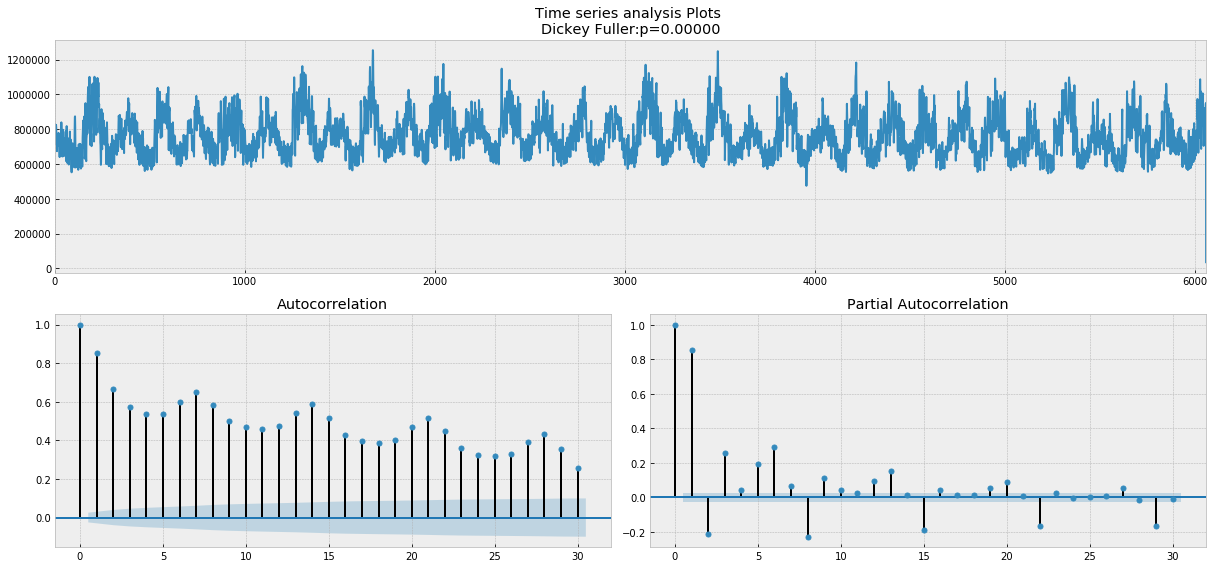

In [47]:
tsplot(AEP_Daily.AEP_MW,lags=30)

# As per Dickey Fuller test we can see that process is stattionary since the p_value == 0 over here. 

- Without going into the technicalities of the Dickey-Fuller test, it test the null hypothesis that a unit root is present.

- If it is, then p > 0, and the process is not stationary.

- Otherwise, p = 0, the null hypothesis is rejected, and the process is considered to be stationary.

In [48]:
AEP_DIFF=AEP_Daily.AEP_MW-AEP_Daily.AEP_MW.shift(1)

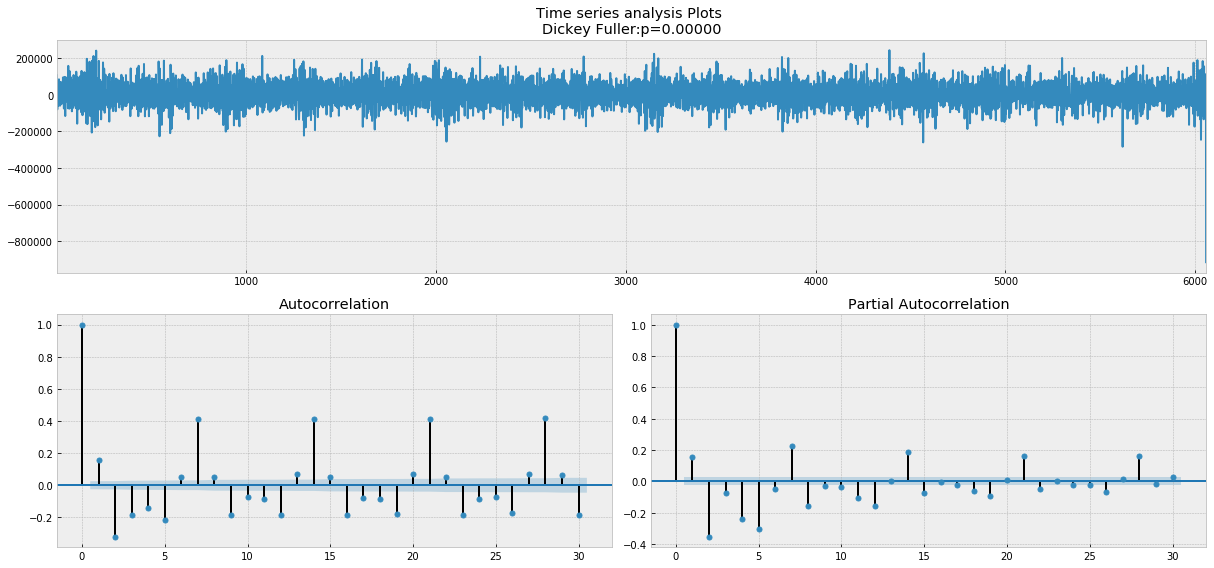

In [49]:
tsplot(AEP_DIFF[1:],lags=30)

In [50]:
#SARIMA

In [51]:
# set initial values and some bounds : 
ps=range(0,3)
d=1
qs=range(0,3)
Ps=range(0,3)
D=1
Qs=range(0,3)
s=5
#Create a list for all possible combinations of parameters : 
parameters=product(ps,qs,Ps,Qs)
parameters_list=list(parameters)
len(parameters_list)

81

In [52]:
# From this code cell, you should see that we have 625 different combinations! 
# Now, we will try each combination and train SARIMA with each so to find the best 
# performing model

In [53]:
def optimize_SARIMA(parameters_list,d,D,s):
    results=[]
    best_aic=float('inf')
    for param in tqdm_notebook(parameters_list):
        try : model=sm.tsa.statespace.SARIMAX(AEP_Daily.AEP_MW,
                                             order=(param[0],d,param[1]),
                                             seasonal_order=(param[2],D,param[3],s)
                                             ).fit(disp=-1)
        except : 
            continue
        aic=model.aic
        #Save best model, AIC and parameters:
        if aic<best_aic:
            best_model=model
            best_aic=aic
            best_param=param
        results.append([param,model.aic])
    results_table=pd.DataFrame(results)
    results_table.columns=['parameter','aic']
    #SORT in ascending order lower aic is better
    results_table=results_table.sort_values(by='aic',ascending=True).reset_index(drop=True)
    return results_table

In [54]:
result_table=optimize_SARIMA(parameters_list,d,D,s)

In [55]:
p,q,P,Q=result_table.parameter[0]
best_model=sm.tsa.statespace.SARIMAX(AEP_Daily.AEP_MW,order=(p,d,q),
                                     seasonal_order=(P,D,Q,s)).fit(disp=-1)
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                            AEP_MW   No. Observations:                 6059
Model:             SARIMAX(0, 1, 2)x(0, 1, 1, 5)   Log Likelihood              -74727.516
Date:                           Thu, 27 Feb 2020   AIC                         149463.032
Time:                                   12:19:59   BIC                         149489.865
Sample:                                        0   HQIC                        149472.346
                                          - 6059                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0119      0.010     -1.157      0.247      -0.032       0.008
ma.L2         -0.5380      0.010    -54.671

In [56]:
print(best_model.predict(start=AEP_Daily.AEP_MW.shape[0],end=(AEP_Daily.AEP_MW.shape[0]+5)))
print(mean_absolute_percentage_error(AEP_Daily.AEP_MW[s+d:],best_model.fittedvalues[s+d:]))

6059     37860.272829
6060    499650.286869
6061    500634.146350
6062    502057.006277
6063    500057.142848
6064    499106.419575
dtype: float64
5.849903307895708


In [57]:
print(mean_absolute_percentage_error(AEP_Daily.AEP_MW[s+d:],best_model.fittedvalues[s+d:]))

5.849903307895708


In [58]:
d

1

In [59]:
s

5

In [70]:
print(mean_absolute_percentage_error(AEP_Daily.AEP_MW[6:10],best_model.fittedvalues[6:10]))

12.425469521205187


In [61]:
np.mean(np.abs(1-best_model.fittedvalues[6:]/AEP_Daily.AEP_MW[6:]))*100

5.849903307895708

In [62]:
AEP_Daily.AEP_MW[6:]

6       800012.0
7       824710.0
8       810628.0
9       755317.0
10      742741.0
          ...   
6054    790978.0
6055    828938.0
6056    941539.0
6057    950233.0
6058     35486.0
Name: AEP_MW, Length: 6053, dtype: float64

In [63]:
difference=AEP_Daily.AEP_MW[6:]-best_model.fittedvalues[6:]

In [64]:
normalised_difference=difference/AEP_Daily.AEP_MW[6:]

In [65]:
np.sum(np.abs(normalised_difference))

354.0946472269271

In [66]:
np.mean(np.abs(normalised_difference))*100

5.849903307895708

- The mean absolute percentage error (MAPE) is the mean or average of the absolute percentage errors of forecasts. Error is defined as actual or observed value minus the forecasted value. Percentage errors are summed without regard to sign to compute  MAPE. This measure is easy to understand because it provides the error in terms of percentages. Also, because absolute percentage errors are used, the problem of positive and negative errors canceling each other out is avoided. Consequently,  MAPE has managerial appeal and is a measure commonly used in forecasting.  The smaller the MAPE the better the forecast. 

In [69]:
AEP_Daily[6:10]

Datetime    AEP_MW
6 2002-01-07  800012.0
7 2002-01-08  824710.0
8 2002-01-09  810628.0
9 2002-01-10  755317.0

In [72]:
AEP_Daily.sort_values(by='Datetime',ascending=False)

Datetime    AEP_MW
6058 2018-08-03   35486.0
6057 2018-08-02  950233.0
6056 2018-08-01  941539.0
6055 2018-07-31  828938.0
6054 2018-07-30  790978.0
...         ...       ...
4    2002-01-05  729723.0
3    2002-01-04  809171.0
2    2002-01-03  828285.0
1    2002-01-02  822277.0
0    2002-01-01  714857.0

[6059 rows x 2 columns]

In [73]:
x=pd.date_range(start='03/08/2018', end='03/08/2019')

In [82]:
forecast_date=x.to_frame(index=False).rename(columns={0:'Datetime'})

In [98]:
print(best_model.predict(start=1,end=(forecast_date.shape[0])))

1      7.118031e+05
2      5.234621e+05
3      9.609683e+05
4      6.566438e+05
5      1.153020e+06
           ...     
362    7.455844e+05
363    7.087326e+05
364    7.901520e+05
365    6.926349e+05
366    7.039546e+05
Length: 366, dtype: float64


In [110]:
forecast_date

Datetime
0   2018-03-08
1   2018-03-09
2   2018-03-10
3   2018-03-11
4   2018-03-12
..         ...
361 2019-03-04
362 2019-03-05
363 2019-03-06
364 2019-03-07
365 2019-03-08

[366 rows x 1 columns]

In [137]:
Forecast_Aug18_Aug19=pd.concat([forecast_date.Datetime,best_model.predict(start=1,end=(forecast_date.shape[0])).reset_index().drop(columns='index')],axis=1).rename(columns={0:'Forecasted_Value'})

In [140]:
Forecast_Aug18_Aug19['Forecasted_Value']=round(Forecast_Aug18_Aug19['Forecasted_Value'],2)

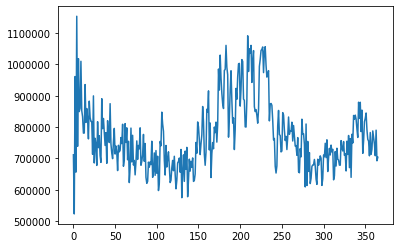

In [143]:
plt.plot(Forecast_Aug18_Aug19.Forecasted_Value)

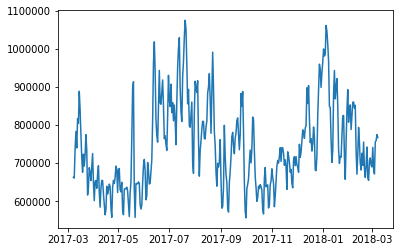

In [152]:
plt.plot(AEP_Daily[(AEP_Daily['Datetime']>='2017-03-08') & (AEP_Daily['Datetime']<='2018-03-08')]['Datetime'],AEP_Daily[(AEP_Daily['Datetime']>='2017-03-08') & (AEP_Daily['Datetime']<='2018-03-08')]['AEP_MW'])

In [141]:
best_model.predict(start=1,end=(forecast_date.shape[0])).reset_index().drop(columns='index')

0
0    7.118031e+05
1    5.234621e+05
2    9.609683e+05
3    6.566438e+05
4    1.153020e+06
..            ...
361  7.455844e+05
362  7.087326e+05
363  7.901520e+05
364  6.926349e+05
365  7.039546e+05

[366 rows x 1 columns]

In [123]:
forecast_date

Datetime
0   2018-03-08
1   2018-03-09
2   2018-03-10
3   2018-03-11
4   2018-03-12
..         ...
361 2019-03-04
362 2019-03-05
363 2019-03-06
364 2019-03-07
365 2019-03-08

[366 rows x 1 columns]